# Imports

In [109]:
import torch
import torch.nn as nn
import random as rand
import torchvision.datasets as dsets
import torchvision.transforms as transforms

%matplotlib inline
import matplotlib.pyplot as plt

## GPU or CPU

In [110]:
# Enable GPU computation if
# this one is available
if torch.cuda.is_available():
    avDev = torch.device("cuda")
else:
    avDev = torch.device("cpu")
    
print("Computation on: ", avDev)

Computation on:  cpu


# Dataset

In [113]:
# Load dataset
trainset = dsets.CIFAR10('./data', train=True, download=True, transform=transforms.ToTensor())
testset = dsets.CIFAR10('./data', train=False, download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [114]:
print(len(trainset))

50000


In [115]:
# Datasets as DataLoader instances
train_loader = torch.utils.data.DataLoader(dataset=trainset, 
                                           batch_size=batch_size, 
                                           shuffle=True)
 
test_loader = torch.utils.data.DataLoader(dataset=testset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Network

## Params

In [119]:
n_iters = 5000
output_dim = 10
batch_size = 100
hidden_dim = 300
input_dim = 3*32*32
learning_rate = 0.05
num_epochs = (n_iters // (len(trainset) // batch_size)) * 3
print(num_epochs)

30


## Model

In [120]:
class LogisticRegressionModel(nn.Module):
    """
        Model definition.
    """
    def __init__(self, input_dim, output_dim):
        """
            Initializer
        """
        super(LogisticRegressionModel, self).__init__()
        # First pass
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        
        # Second pass
        self.linear2 = nn.Linear(hidden_dim, output_dim)
        
        # Non linear function
        self.relu = nn.ReLU()
     
    def forward(self, x):
        """
            Forward pass
        """
        a1 = self.relu(self.linear1(x))
        a2 = self.linear2(a1)
        return a2

## Model Instance

In [121]:
model = LogisticRegressionModel(input_dim, output_dim)
model.to(avDev)

LogisticRegressionModel(
  (linear1): Linear(in_features=3072, out_features=300, bias=True)
  (linear2): Linear(in_features=300, out_features=10, bias=True)
  (relu): ReLU()
)

## Loss function

In [122]:
criterion = nn.CrossEntropyLoss().to(avDev)

## Optimizer

In [123]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [124]:
len(train_loader)

500

## Test

In [125]:
def test():
    # Calculate Accuracy         
    total, correct = 0, 0

    # Iterate through test dataset
    for images, labels in test_loader:
        # Resizing
        images = images.view(-1, input_dim).to(avDev)

        # Forward pass only to get logits/output
        outputs = model(images)

        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)

        # Total number of labels
        total += labels.size(0)

        # Total correct predictions
        correct += (predicted.cpu() == labels.cpu()).sum().float()

    return 100. * correct / total

## Train

In [128]:
# Accuracy and loss
acc, losses = [], []

# Number of iteration so far
count = 0

# Epoch training
for epoch in range(num_epochs):
    # Loss per epoch
    running_loss = 0
    
    # Batch training
    for i, (images, labels) in enumerate(train_loader):
        
        # Reshape images
        images = images.view(-1, input_dim).to(avDev)
        labels = labels.to(avDev)
         
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
         
        # Forward pass to get output/logits
        outputs = model(images)
         
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
         
        # Getting gradients w.r.t. parameters
        loss.backward()
         
        # Updating parameters
        optimizer.step()
        
        # Iteration update
        count += 1
        
        # Update loss
        running_loss += loss.item()
        
    # Update batch accuracy
    acc_epoch = test()
         
    # Compute average loss
    avg_loss = running_loss / len(train_loader)
    
    # Print Loss
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, avg_loss, acc_epoch))
    
    # Average loss per epoch
    losses.append(avg_loss)
    
    # Average accuracy per epoch
    acc.append(acc_epoch)

Epoch: 0. Loss: 1.934526578426361. Accuracy: 37.65999984741211
Epoch: 1. Loss: 1.7530690679550172. Accuracy: 41.84000015258789
Epoch: 2. Loss: 1.6725151424407958. Accuracy: 41.880001068115234
Epoch: 3. Loss: 1.6177044355869292. Accuracy: 43.060001373291016
Epoch: 4. Loss: 1.5757282423973082. Accuracy: 45.470001220703125
Epoch: 5. Loss: 1.5379710600376129. Accuracy: 44.790000915527344
Epoch: 6. Loss: 1.506920598268509. Accuracy: 45.81999969482422
Epoch: 7. Loss: 1.479652362346649. Accuracy: 47.18000030517578
Epoch: 8. Loss: 1.455947709083557. Accuracy: 47.689998626708984
Epoch: 9. Loss: 1.4322962982654572. Accuracy: 48.11000061035156
Epoch: 10. Loss: 1.4137624504566193. Accuracy: 48.369998931884766
Epoch: 11. Loss: 1.393079793214798. Accuracy: 47.599998474121094
Epoch: 12. Loss: 1.3753901050090789. Accuracy: 50.43000030517578
Epoch: 13. Loss: 1.3572192225456239. Accuracy: 46.619998931884766
Epoch: 14. Loss: 1.3429291181564331. Accuracy: 48.380001068115234
Epoch: 15. Loss: 1.329878320932

## Plots

### Accuracy

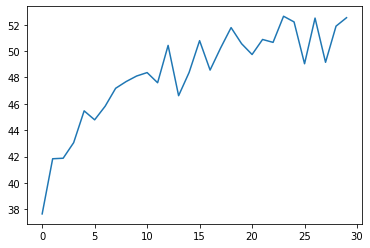

In [135]:
plt.plot(acc)

### Loss

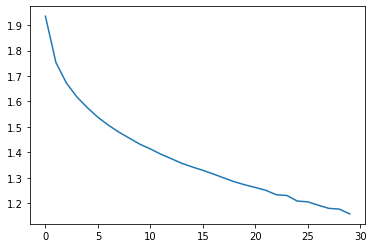

In [136]:
plt.plot(losses)